In [2]:
# 便利なモジュールを一通りimportしておきます
import numpy as np
from numpy.random import randn
import pandas as pd

# 統計的な機能を実現するモジュール
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 離散一様分布について

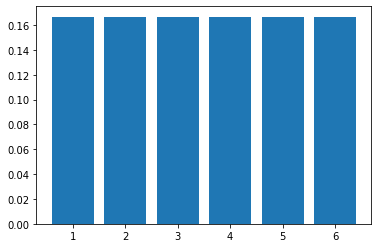

In [7]:
# 仮想的なサイコロを作って離散一様分布を理解する

roll_options = [1,2,3,4,5,6]

# 確率の総和
tprob = 1

# 公正なサイコロ
prob_roll = tprob / len(roll_options)

uni_plot = plt.bar(roll_options,[prob_roll]*6 )

In [8]:
from scipy.stats import randint

In [9]:
low,high = 1,7

mean, var = randint.stats(low,high)
print('平均{} 分散{}'.format(mean,var))

平均3.5 分散2.9166666666666665


<BarContainer object of 6 artists>

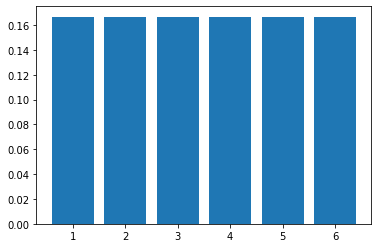

In [10]:
plt.bar(roll_options, randint.pmf(roll_options,low,high))

### 連続一様分布

In [11]:
# 連続一様分布では数を無限に細かく区切ることができる
# 取りうる値の個数が無限になってしまう => 確率 1/無限 <=> 0　となってしまう

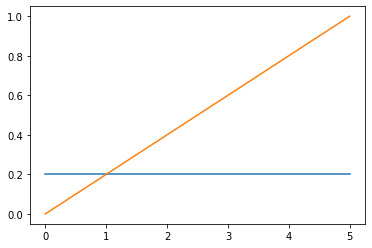

In [12]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 最小と最大を作ります。
A=0
B=5

# AからBまで100ポイントを作っておきます。
x = np.linspace(A,B,100)

# 連続一様分布は、uniform(loc=start point,scale=endpoint)で作れます。
rv = uniform(loc=A,scale=B)

# 確率密度関数（PDF）と累積分布関数（Cumulative Distribution Function)を描いてみます。
plt.plot(x,rv.pdf(x))
plt.plot(x,rv.cdf(x))

### 二項分布

In [16]:
#Aの成功率
p_A = .72
# シュートの数
n_A = 11

# 成功数
k = 6

# 組み合わせを求めるため
from scipy.special import comb

comb_A = comb(n_A,k)
print(comb_A)

# これらを掛け合わせれば、確率がでます。
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# パーセントで結果を格納しておきます。
answer_A = 100*answer_A

# Bも同様の計算ができます。
p_B = .48
n_B = 15
comb_B = comb(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

print('プレイヤーAが平均的な試合で6回シュートを決める確率は{:0.2f}% '.format(answer_A))
print('')
print('プレイヤーBが平均的な試合で6回シュートを決める確率は{:0.2f}%'.format(answer_B))

462.0
プレイヤーAが平均的な試合で6回シュートを決める確率は11.08% 

プレイヤーBが平均的な試合で6回シュートを決める確率は17.02%


In [51]:
answer__A = []
answer__B = []

k = 6
p__y = []
for k in range(11):
    p__a = []
    p__b = []
    
    p__y.append(k)
    
    p_B = .48
    n_B = 15
    comb_B = comb(n_B,k)
    p__b.append(100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k)))
    answer__B.append(p__b.copy())

    n_A = 11
    comb_A = comb(n_A,k)
    answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
    p__a.append(100*answer_A)
    answer__A.append(p__a.copy())

In [52]:
answer__A

[[8.293509467471881e-05],
 [0.0023458783922277603],
 [0.03016129361435691],
 [0.23267283645361042],
 [1.1966031589042823],
 [4.307771372055415],
 [11.07712638528535],
 [20.34574234032003],
 [26.158811580411463],
 [22.421838497495536],
 [11.531231227283419]]

In [53]:
answer__B

[[0.005496043412801869],
 [0.07609906263879511],
 [0.49171702012759916],
 [1.9668680805103962],
 [5.446711607567251],
 [11.061014341521187],
 [17.016945140801823],
 [20.195934892380183],
 [18.642401439120167],
 [13.38428821270166],
 [7.4128365485732255]]

Text(0, 0.5, 'y axis')

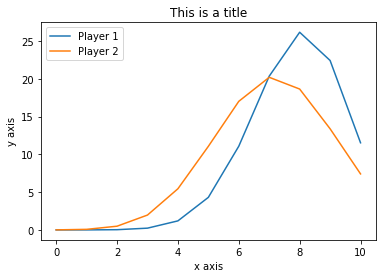

In [59]:
p1 = plt.plot(p__y,answer__A)
p2 = plt.plot(p__y,answer__B)
plt.legend((p1[0], p2[0]), ("Player 1", "Player 2"), loc=2)
plt.title("Point ")
plt.xlabel("x axis")
plt.ylabel("y axis")

### ポアソン分布

In [41]:
# 残念ながら、lambdaはPythonでは予約語なので、そのまま変数名には使えます。

# lambとして、λをセットします。
lamb = 10

# ちょうど7人来る確率を計算したいので、k=7です。
k=7

# 標準mathモジュールから、必要なモノをインポート
from math import exp
from math import factorial

# factorial は階乗を計算する

# 確率質量関数をつかって確率を計算します。
prob = (lamb**k)*exp(-lamb)/factorial(k)

print(' 昼のピーク時にお客さんが7人である確率は、{:0.2f}%です。'.format(100*prob))

 昼のピーク時にお客さんが7人である確率は、9.01%です。


In [42]:
# scipy.statsから、 poissonをインポートします
from scipy.stats import poisson

# 平均は10です。
mu = 10

# 平均と分散を計算できます。
mean,var = poisson.stats(mu)

# 確率質量関数を使って、特定の確率を計算することも可能です。
odds_seven = poisson.pmf(7,mu)

print('ピーク時に7人の確率は{:0.2f}％'.format(odds_seven*100))

print('平均={}'.format(mean))

ピーク時に7人の確率は9.01％
平均=10.0


In [43]:
# 確率質量関数をプロットしてみましょう。

import numpy as np

# ひとまず、30人のお客さんが来る確率です。理論的には無限大まであり得ます。
k=np.arange(30)

# 平均は10です。
lamb = 10

# これで確率を計算できます。
pmf_pois = poisson.pmf(k,lamb)
pmf_pois

array([4.53999298e-05, 4.53999298e-04, 2.26999649e-03, 7.56665496e-03,
       1.89166374e-02, 3.78332748e-02, 6.30554580e-02, 9.00792257e-02,
       1.12599032e-01, 1.25110036e-01, 1.25110036e-01, 1.13736396e-01,
       9.47803301e-02, 7.29079462e-02, 5.20771044e-02, 3.47180696e-02,
       2.16987935e-02, 1.27639962e-02, 7.09110899e-03, 3.73216263e-03,
       1.86608131e-03, 8.88610150e-04, 4.03913704e-04, 1.75614654e-04,
       7.31727725e-05, 2.92691090e-05, 1.12573496e-05, 4.16938875e-06,
       1.48906741e-06, 5.13471521e-07])

<BarContainer object of 30 artists>

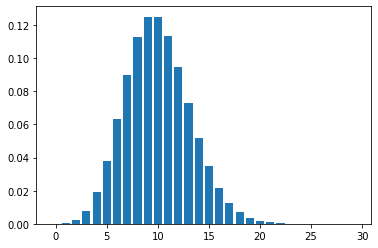

In [44]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.bar(k,pmf_pois)

### 正規分布

In [45]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')